In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns

In [33]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


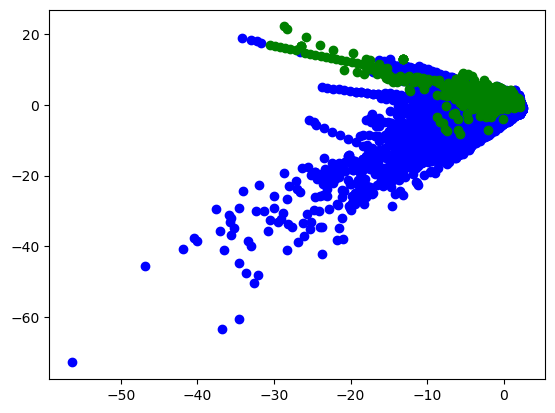

In [35]:
X=df['V1']
y=df['V2']
label=df["Class"]
plt.scatter(X[label==0],y[label==0],c="blue")
plt.scatter(X[label==1],y[label==1],c="green")

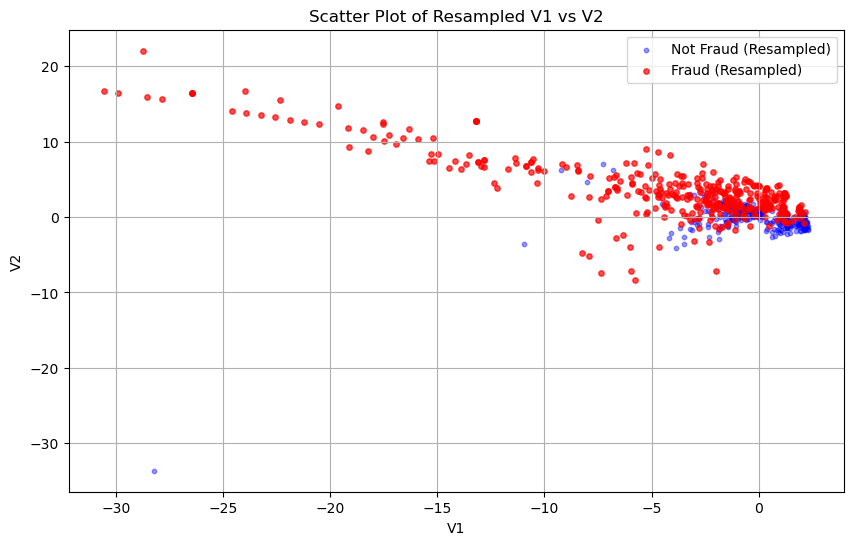

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Load the dataset (if not already loaded)
df = pd.read_csv("creditcard.csv")

# Prepare X and y
X = df.drop("Class", axis=1)
y = df["Class"].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Plot using two features, e.g., V1 and V2
plt.figure(figsize=(10, 6))
# Resampled non-fraud (0) and fraud (1)
plt.scatter(X_resampled[y_resampled == 0]['V1'], X_resampled[y_resampled == 0]['V2'], 
            c='blue', label='Not Fraud (Resampled)', alpha=0.4, s=10)
plt.scatter(X_resampled[y_resampled == 1]['V1'], X_resampled[y_resampled == 1]['V2'], 
            c='red', label='Fraud (Resampled)', alpha=0.7, s=15)

plt.title('Scatter Plot of Resampled V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.grid(True)
plt.show()


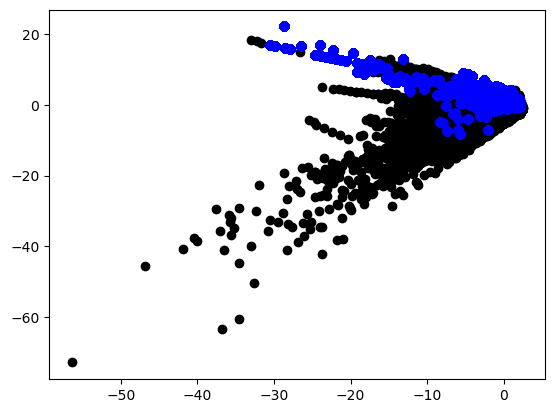

In [62]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X=df.drop("Class",axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
plt.scatter(X_res['V1'][y_res==0],X_res['V2'][y_res==0],c="black")
plt.scatter(X_res['V1'][y_res==1],X_res['V2'][y_res==1],c="blue")

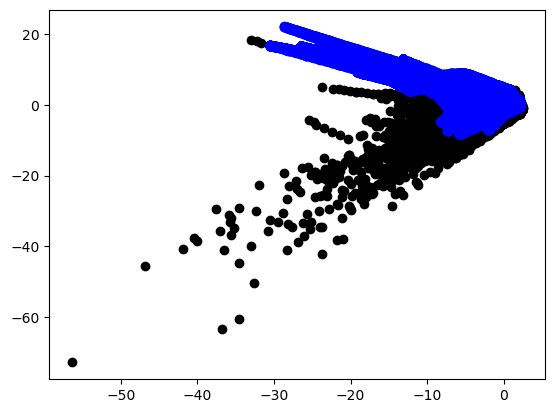

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X=df.drop("Class",axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
plt.scatter(X_res['V1'][y_res==0],X_res['V2'][y_res==0],c="black")
plt.scatter(X_res['V1'][y_res==1],X_res['V2'][y_res==1],c="blue")